In [6]:
from matplotlib import pyplot as plt
import platform, os, sys, h5py
import numpy as np
from tabulate import tabulate
from pprint import pprint
from importlib import reload

if 'Windows' in platform.system():
    sys.path.append(r'C:\Users\slab\Documents\Code')
    sys.path.append(r'D:\BEMPP_shared\Modules')
    import interpolate_slow
else:
    sys.path.append("/Users/gkoolstra/Documents/Code")
    from BEMHelper import interpolate_slow
    
from Common import common, kfit
from TrapAnalysis import trap_analysis
from TrapAnalysis import artificial_anneal as anneal

%matplotlib inline
%config InlineBackend.figure_format='retina'

Could not import BEM module. Please do so manually.


In [9]:
filepath = r"/Volumes/slab/_Data/170422 - EonHe M018V6 with L3 etch/data/170703/122617_electron_loading_stabilize_e_density_fill_to_6p75"
filename = r"122617_electron_loading_stabilize_e_density_fill_to_6p75.h5"

with h5py.File(os.path.join(filepath, filename)) as f:
    for step in f.keys():
        print(step,)
        try:
            vars()[step] = f[step][()]
        except:
            pass

Q_pre_meas
Vpinch
Vres
Vrg
Vtg
Vtrap
f0_pre_meas
fpts
mags
nwa_config
phases
temperature
time
voltage_log


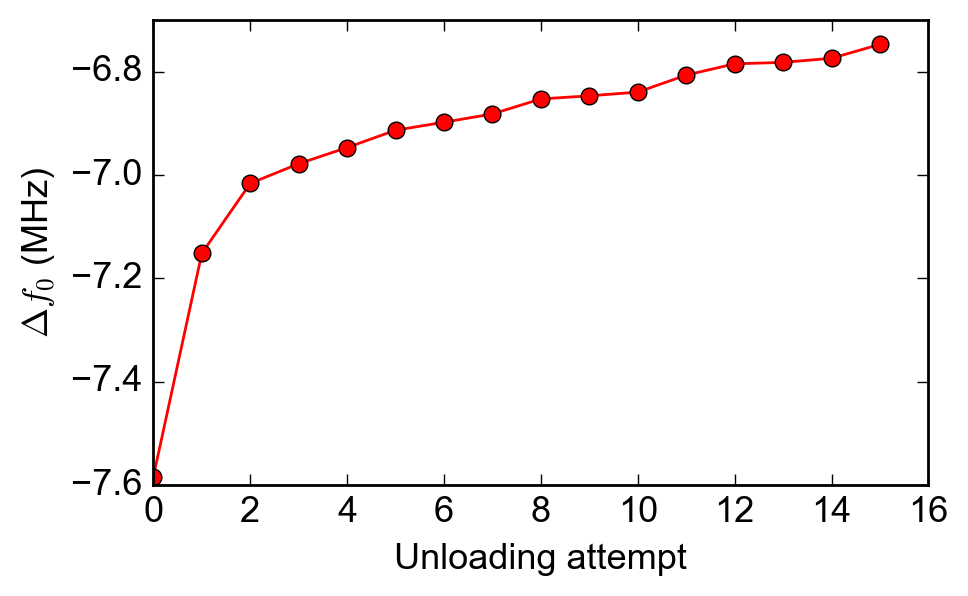

In [14]:
plt.figure(figsize=(5.,3.))
common.configure_axes(13)
plt.plot((f0_pre_meas-6.40511E9)/1E6, '-or')
plt.xlabel("Unloading attempt")
plt.ylabel("$\Delta f_0$ (MHz)")

In [35]:
def error(f0, target):
    return np.abs(f0[-1]-target)

def differential(f0):
    return f0[-1]-f0[-2]

P = -0.0250
D = 0.10
target = 6.0

In [37]:
f0s = (f0_pre_meas-6.40511E9)/1E6
for k in np.arange(2, len(f0s)):
    v = P * error(f0s[:k], target) + D * differential(f0s[:k])
    print(v)

-0.285570185339
-0.311865272374
-0.320648607067
-0.320544509887
-0.319474562004
-0.320901652019
-0.320442199753
-0.318416453147
-0.320562109293
-0.320272836335
-0.316878989459
-0.317436813775
-0.319264710697
-0.318564737336
